In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df0=pd.read_pickle('dfs/df_run_02_CTRL.pkl')[30:]
df0['rtpmax']=-df0['rtpmax']
dfl=pd.read_pickle('dfs/df_run_02_land.pkl')
# df1n=pd.read_pickle('dfs/df_run_01_CTRL_smcc.pkl')
# df1nn=pd.read_pickle('dfs/df_run_01_CTRL_smcc_smrp.pkl')
dfd=pd.read_pickle('dfs/df_run_02_dry.pkl')

# dfs=[df0,df1,df2]
dfs=[df0,dfl,dfd]

(0.0, 100.0)

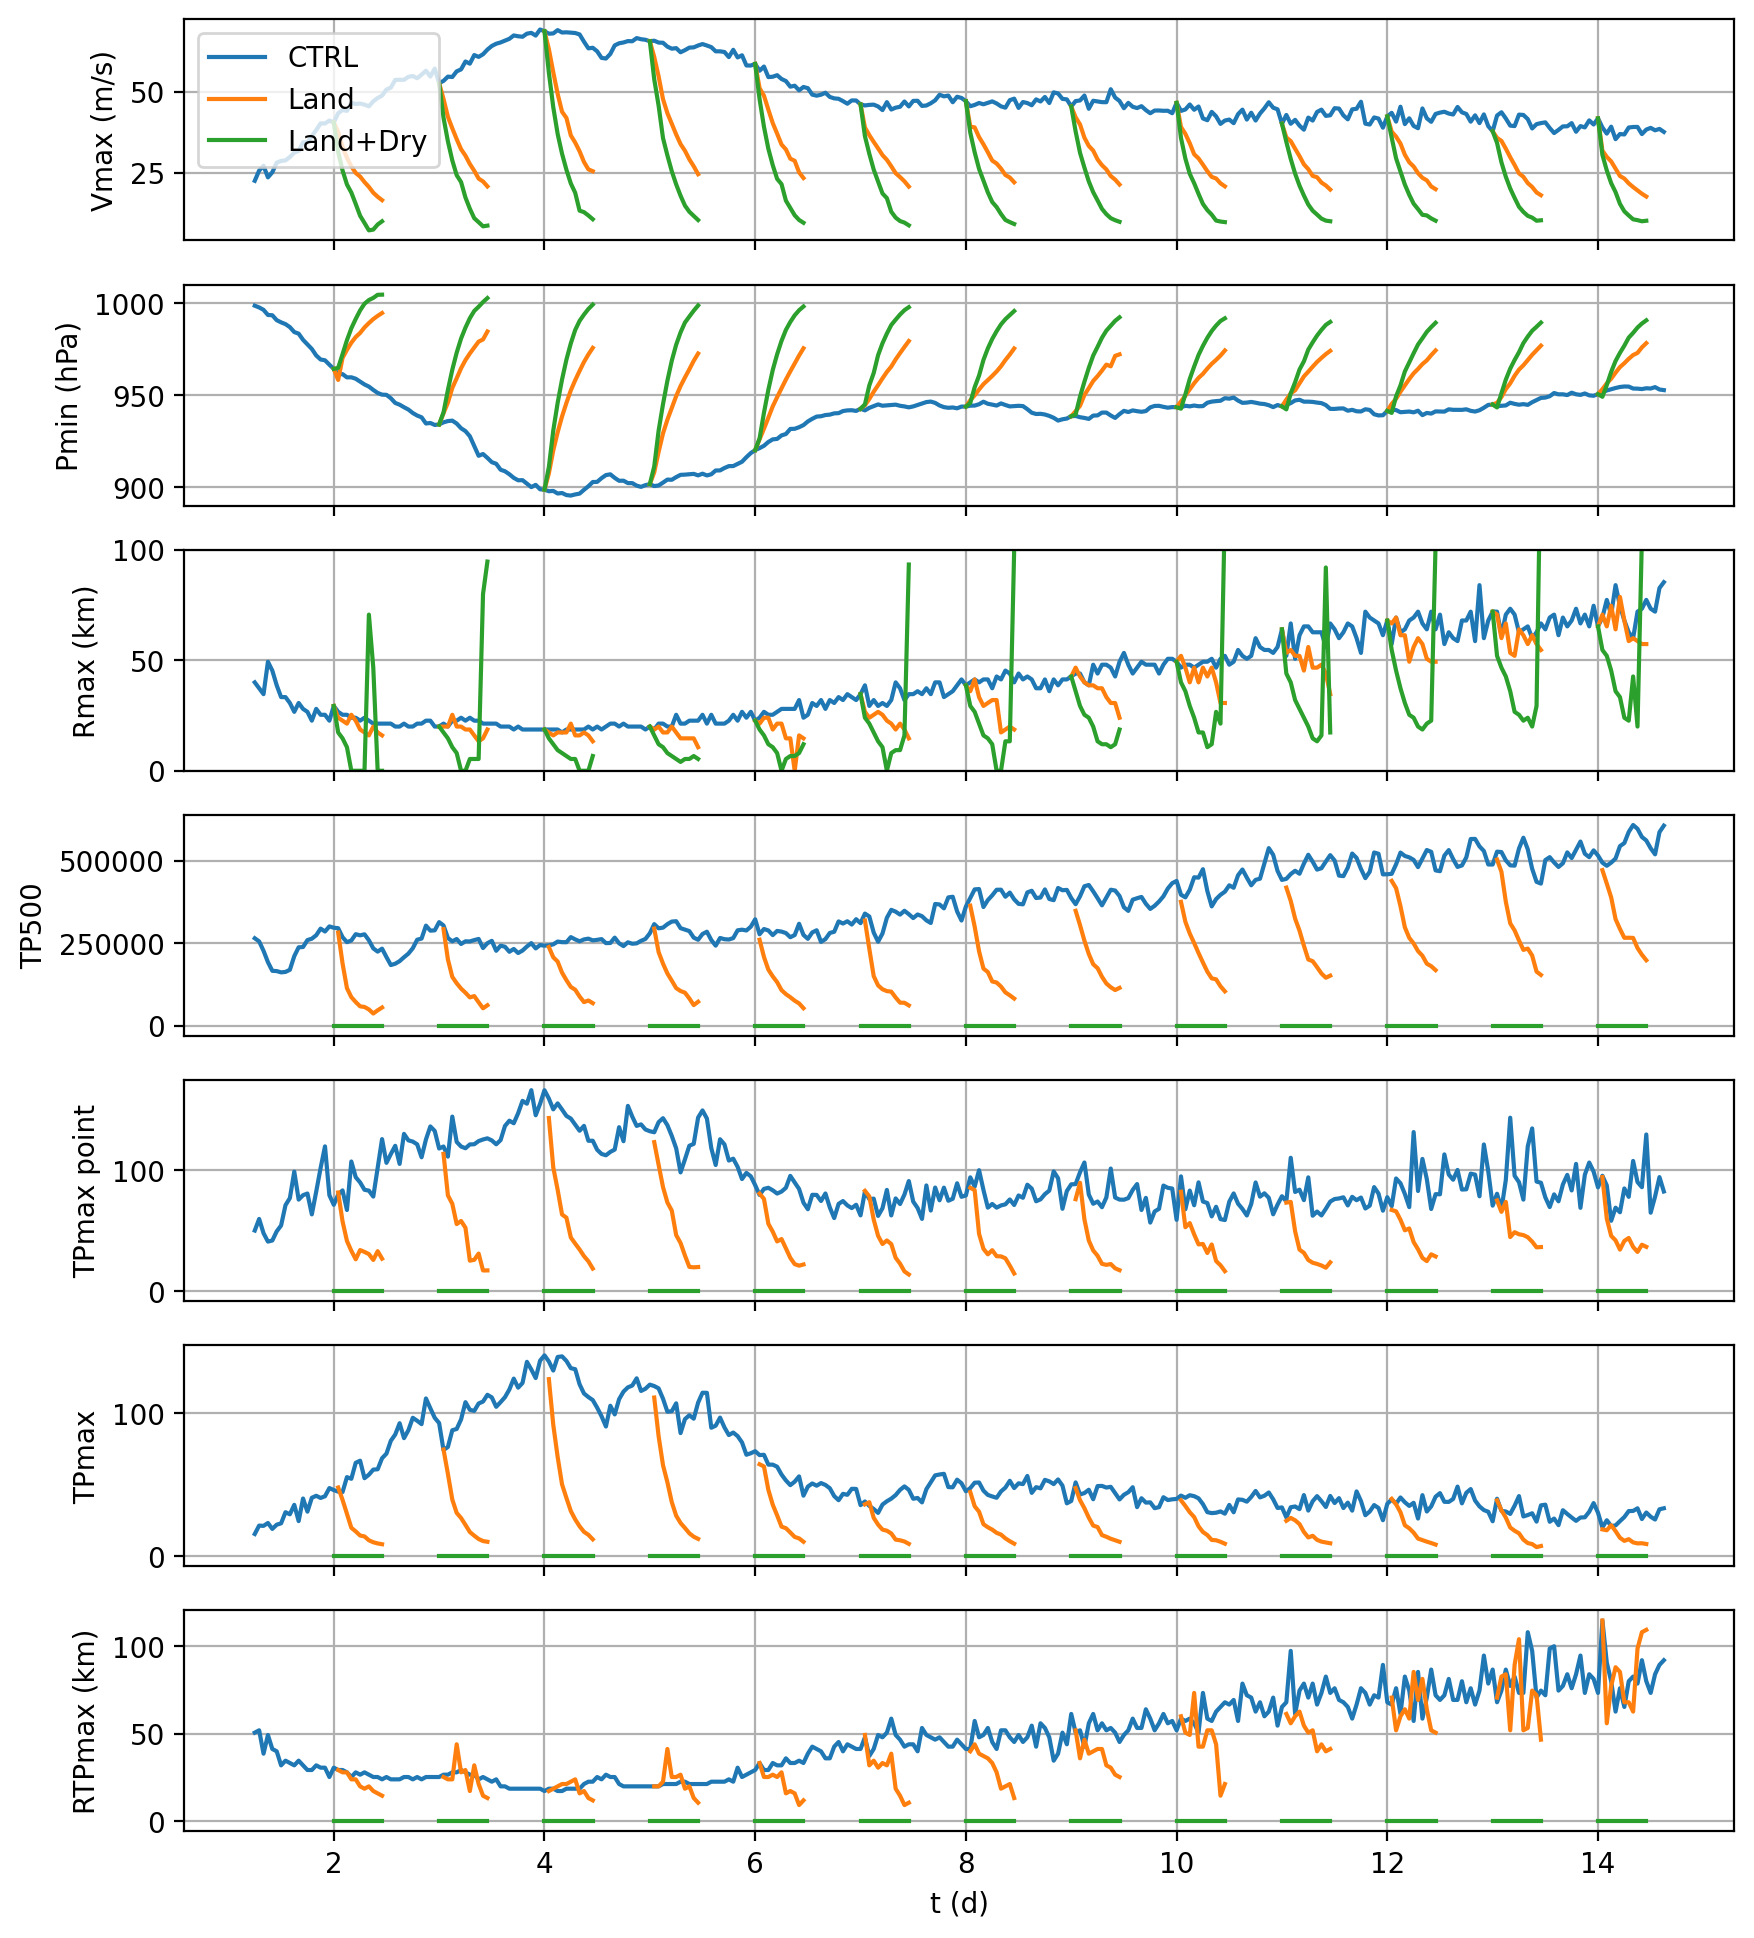

In [21]:
hs=[]
fig,axs=plt.subplots(7,1,dpi=200,figsize=(10,12),sharex=True)
pvars=[
    {'y':'V10max',    'ylab':'Vmax (m/s)'},
    {'y':'Pmin',      'ylab':'Pmin (hPa)'},
    {'y':'rV10max',   'ylab':'Rmax (km)'},
    {'y':'tp500',     'ylab':'TP500'},
    {'y':'tpmaxpoint','ylab':'TPmax point'},
    {'y':'tpmax',     'ylab':'TPmax'},
    {'y':'rtpmax',    'ylab':'RTPmax (km)'},

]

# pvars=['V10max','Pmin','rV10max']

cols=['C0','C1','C2']
for df,col in zip(dfs,cols):
    for ax,pvar in zip(axs,pvars):
        for n,tlf in enumerate(df.tlf.unique()):
            dft=df[df.tlf.eq(tlf)]
#             tp500d=dft['tp500'].diff()
#             dft.loc[:,'tp500d']=tp500d
            if tlf>0:
                dft=dft[:12]
            h=ax.plot(dft.t,dft[pvar['y']],color=col)
        ax.grid(True)
        ax.set_ylabel(pvar['ylab'])
    hs.append(h[0])
    
axs[-1].set_xlabel('t (d)')
axs[0].legend(hs,('CTRL','Land','Land+Dry'))
axs[2].set_ylim((0,100))
# axs[3].set_ylim((0,1e6))